In [ ]:
# !pip list

In [ ]:
# !pip install nltk

# Downloading Stuffs

In [ ]:
import nltk

# t1
nltk.download('gutenberg')
nltk.download('reuters')

# t2, t3 & t4
nltk.download('inaugural')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# t3
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# t4
nltk.download('state_union')

# t5
nltk.download('udhr')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_pe

True

# TASK 1

In [ ]:
from nltk.corpus import gutenberg


gutenberg_files = gutenberg.fileids()
print("Files in the Gutenberg Corpus:")
print(gutenberg_files)

Files in the Gutenberg Corpus:
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [ ]:
from nltk.corpus import reuters


reuters_categories = reuters.categories()
print("Categories in the Reuters Corpus:")
print(reuters_categories)

Categories in the Reuters Corpus:
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


# TASK 2

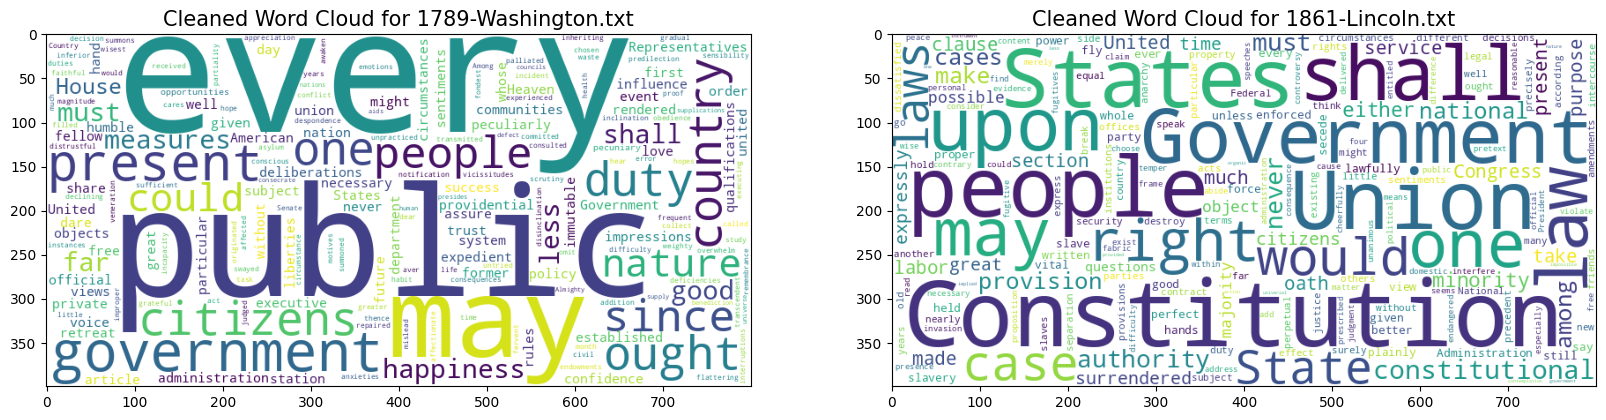

In [ ]:
from nltk.corpus import inaugural
from wordcloud import WordCloud as wc

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import matplotlib.pyplot as plt


# inaugural.fileids()
fileid1 = '1789-Washington.txt'
fileid2 = '1861-Lincoln.txt'

text1 = inaugural.raw(fileid1)
text2 = inaugural.raw(fileid2)

def process_text_freq(raw_text):
    tokens = word_tokenize(raw_text)
    english_stopwords = stopwords.words('english')

    cleaned_tokens = [
        word for word in tokens
        if word.isalpha() and word.lower() not in english_stopwords
    ]

    freq_dist = FreqDist(cleaned_tokens)

    return freq_dist

# print(text1)
# print(process_text(text1).most_common(10))
# print(process_text(text2).most_common(10))

freq_dist1 = process_text_freq(text1)
freq_dist2 = process_text_freq(text2)

wordcloud1 = wc(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist1)
wordcloud2 = wc(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist2)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud1)
plt.title(f'Cleaned Word Cloud for {fileid1}', fontsize=15)
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2)
plt.title(f'Cleaned Word Cloud for {fileid2}', fontsize=15)
# plt.axis('off')

plt.show()

# TASK 3

In [ ]:
from nltk.corpus import movie_reviews, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import seaborn as sns


neg_file_id = movie_reviews.fileids('neg')[0]
raw_text_movie = movie_reviews.raw(neg_file_id)

lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))


# To convert NLTK's POS tags to a format WordNetLemmatizer understands
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


tokens = word_tokenize(raw_text_movie)
pos_tagged_tokens = nltk.pos_tag(tokens)

lemmatized_words = []

for word, tag in pos_tagged_tokens:
    if word.lower() not in english_stopwords:
        wordnet_pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word.lower(), pos=wordnet_pos) # will this ignore ALL CAPS emphasis. does it really matter?
        lemmatized_words.append(lemma)

freq_dist = FreqDist(lemmatized_words)
top_30_words = freq_dist.most_common(30)

print("\n")
print(top_30_words)
print("\n")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

words, counts = zip(*top_30_words)

barplot = sns.barplot(x=counts, y=words)
barplot.set_title(f'Top 30 Most Frequent Words in {neg_file_id}', fontsize=16)
barplot.set_xlabel("Frequency", fontsize=12)
barplot.set_ylabel("Words (Lemmas)", fontsize=12)

plt.tight_layout()
plt.show()

# plt.bar(words, counts)
# plt.show()

# TASK 4

In [ ]:
import nltk
from nltk.corpus import state_union
from nltk.util import trigrams
import pandas as pd
from collections import Counter


# state_union.fileids()
raw_text = state_union.raw('1975-Ford.txt')

tokens = word_tokenize(raw_text)
english_stopwords = set(stopwords.words('english'))
cleaned_tokens = [
    word.lower() for word in tokens
    if word.isalpha() and word.lower() not in english_stopwords
]

freq_dist = FreqDist(cleaned_tokens)
# print(freq_dist.most_common(10))

top_10_words = [word for word, count in freq_dist.most_common(10)]
print(f"Top 10 most frequent words: {top_10_words}\n")

text_trigrams = list(trigrams(cleaned_tokens))

# print(text_trigrams)

co_occurrence_matrix = pd.DataFrame(0, index=top_10_words, columns=top_10_words)

for w1, w2, w3 in text_trigrams:
    words_in_trigram = {w1, w2, w3}

    for word_a in words_in_trigram:
        if word_a in top_10_words:
            for word_b in words_in_trigram:
                if word_a != word_b and word_b in top_10_words:
                    co_occurrence_matrix.loc[word_a, word_b] += 1

print("Co-occurrence Matrix of Top 10 Words (within trigrams):")
co_occurrence_matrix

# TASK 5

In [ ]:
import nltk
from nltk.corpus import udhr
from nltk.util import bigrams
import pprint

french_words = udhr.words('French_Francais-Latin1')

vowels = "aeiouàâéèêëîïôùûü" # accented characters common in French. For efficeint lookup

all_vowel_bigrams = []

for word in french_words:
    vowel_sequence = [char for char in word.lower() if char in vowels]

    if len(vowel_sequence) >= 2:
        word_bigrams = list(bigrams(vowel_sequence))

        all_vowel_bigrams.extend(word_bigrams)

freq_dist = FreqDist(all_vowel_bigrams)

print("Frequency of Vowel Bigrams in the French UDHR Corpus:")
print("#####################################################")
pprint.pprint(freq_dist.most_common())